# ***The Pulse Of Life***

# **Introduction**

Heart disease is a leading cause of death worldwide, and early detection and prevention are crucial to reducing its impact. The dataset used in this analysis contains information about patients with and without heart disease, including demographic, clinical, and lifestyle factors. The goal of this analysis is to explore the relationships between these factors and heart disease, and to evaluate the performance of various machine learning models in predicting heart disease.

The dataset consists of 303 patients with 14 variables, including age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiogram, maximum heart rate achieved, exercise-induced angina, oldpeak (ST depression induced by exercise relative to rest), the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thal (thalassemia), and the target variable (heart disease).

drawing-human-heart-with-words-heart-it_582637-2957.avif


**This analysis aims to:**

Explore the distribution of the target variable and the
relationships between variables,Visualize the relationships between variables using various plots.Evaluate the performance of logistic regression, decision tree classifier, random forest classifier, Gaussian naive Bayes, and K-nearest neighbors models in predicting heart disease
Identify the most important features contributing to heart disease prediction


# **Data Overview**

The dataset contains 303 rows and 14 columns, including the target variable 'target' which indicates whether a person has heart disease (1) or not (0).
The dataset has no missing values.


# 1: Importing Libraries and Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#  2: Loading dataset

In [ ]:
df=pd.read_csv('/content/heart.csv')


# 3: Exploratory data analysis

Display top 5 Rows of the dataset

In [ ]:
#To show top 5 datasets
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

Display the last 5 Rows of the Dataset

In [ ]:
#To show bottom 5 datasets
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

Find the number of Rows and columns of the dataset

In [ ]:

df.shape

(1025, 14)

 show the no.of total values in the dataset

In [ ]:
df.size

14350

show the starting value and the ending value

In [ ]:

df.index

RangeIndex(start=0, stop=1025, step=1)

 show each column name

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Find the minimum age and maximum age of this dataset

In [ ]:
df['age'].min() , df['age'].max()

(29, 77)

Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Count number of distinct elements in specified axis.

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df['sex'].unique()

array([1, 0])

Check For Duplicate Data and Drop Them

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
#To check row wise and detect the duplicate rows
df[df.duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2   0     2       1  
43        2   0     3       0  
55        0   0     3       0  
61        1   1     2       1  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[723 rows x 14 columns]

In [ ]:
#To remove  duplicate rows permanently
df.drop_duplicates(inplace=True)

In [ ]:
#after removing the duplicated values from data sets
df[df.duplicated()]

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

In [ ]:
df.shape

(302, 14)

find there is  any null values?

In [ ]:
df.isnull().sum() #there is no null values in this dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#To show the null values in each column
df.isnull()

age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
723  False  False  False     False  False  False    False    False  False   
733  False  False  False     False  False  False    False    False  False   
739  False  False  False     False  False  False    False    False  False   
843  False  False  False     False  False  False    False    False  False   
878  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  False   False  
1      False  False  False  False   False  
2      False  False  False  False   False  
3      False  False  False  False   False  
4      False  False  False  False   False  
..       ...    ...    ...    ...     ...  
723    False  False  False  False   False  
733    False  False  False  False   False  
739    False  False  False  False   False  
843    False  False  False  False   False  
878    False  False  False  False   False  

[302 rows x 14 columns]

count the occurence of all value

In [ ]:

df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

count the occurence of each value

In [ ]:
df['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

count the occurence of each chestpain type based on the distribution of gender wise

In [ ]:
df.groupby('sex')['cp'].value_counts()

sex  cp
0    0     133
     2     109
     1      57
     3      13
1    0     364
     2     175
     1     110
     3      64
Name: count, dtype: int64

0=female
1=male
it counts the occurence of gender value

In [ ]:

#0=female
#1=male
#it counts the occurence of all individual value
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

To show the number of males affected by heart diseases
(1 means men)

In [ ]:

df[df['sex'].isin([1])]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
6      58    1   0       114   318    0        2      140      0      4.4   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1019   47    1   0       112   204    0        1      143      0      0.1   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
6         0   3     1       0  
...     ...  ..   ...     ...  
1019      2   0     2       1  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1024      1   1     3       0  

[713 rows x 14 columns]

To show the number of females affected by heart diseases
(0 means females)

In [ ]:
#To show the number of females affected by heart diseases
#0 means females
df[df['sex'].isin([0])]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
4      62    0   0       138   294    1        1      106      0      1.9   
5      58    0   0       100   248    0        0      122      0      1.0   
10     71    0   0       112   149    0        1      125      0      1.6   
11     43    0   0       132   341    1        0      136      1      3.0   
12     34    0   1       118   210    0        1      192      0      0.7   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
996    56    0   0       134   409    0        0      150      1      1.9   
1004   51    0   2       140   308    0        0      142      0      1.5   
1005   55    0   0       128   205    0        2      130      1      2.0   
1014   44    0   2       108   141    0        1      175      0      0.6   
1023   50    0   0       110   254    0        0      159      0      0.0   

      slope  ca  thal  target  
4         1   3     2       0  
5         1   0     2       1  
10        1   0     2       1  
11        1   0     3       0  
12        2   0     2       1  
...     ...  ..   ...     ...  
996       1   2     3       0  
1004      2   1     2       1  
1005      1   1     3       0  
1014      1   0     2       1  
1023      2   0     2       1  

[312 rows x 14 columns]

Female affected heart disease greater than age 50

In [ ]:
# female affected heart disease greater than age 50
df[(df['age']>=50) & (df['sex']==0) ]


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
4      62    0   0       138   294    1        1      106      0      1.9   
5      58    0   0       100   248    0        0      122      0      1.0   
10     71    0   0       112   149    0        1      125      0      1.6   
16     51    0   2       140   308    0        0      142      0      1.5   
18     50    0   1       120   244    0        1      162      0      1.1   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
992    50    0   0       110   254    0        0      159      0      0.0   
996    56    0   0       134   409    0        0      150      1      1.9   
1004   51    0   2       140   308    0        0      142      0      1.5   
1005   55    0   0       128   205    0        2      130      1      2.0   
1023   50    0   0       110   254    0        0      159      0      0.0   

      slope  ca  thal  target  
4         1   3     2       0  
5         1   0     2       1  
10        1   0     2       1  
16        2   1     2       1  
18        2   0     2       1  
...     ...  ..   ...     ...  
992       2   0     2       1  
996       1   2     3       0  
1004      2   1     2       1  
1005      1   1     3       0  
1023      2   0     2       1  

[236 rows x 14 columns]

Female affected lessthan age 50

In [ ]:
#female affected lessthan age 50
df[(df['age']<=50) & (df['sex']==0) ]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
11     43    0   0       132   341    1        0      136      1      3.0   
12     34    0   1       118   210    0        1      192      0      0.7   
15     34    0   1       118   210    0        1      192      0      0.7   
18     50    0   1       120   244    0        1      162      0      1.1   
24     42    0   2       120   209    0        1      173      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
956    49    0   0       130   269    0        1      163      0      0.0   
964    44    0   2       108   141    0        1      175      0      0.6   
992    50    0   0       110   254    0        0      159      0      0.0   
1014   44    0   2       108   141    0        1      175      0      0.6   
1023   50    0   0       110   254    0        0      159      0      0.0   

      slope  ca  thal  target  
11        1   0     3       0  
12        2   0     2       1  
15        2   0     2       1  
18        2   0     2       1  
24        1   0     2       1  
...     ...  ..   ...     ...  
956       2   0     2       1  
964       1   0     2       1  
992       2   0     2       1  
1014      1   0     2       1  
1023      2   0     2       1  

[85 rows x 14 columns]

male affected greater than age 50

In [ ]:
male_greaterthan50=df[(df['age']>=50) & (df['sex']==1) ]
male_greaterthan50

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
6      58    1   0       114   318    0        2      140      0      4.4   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1016   65    1   3       138   282    1        0      174      0      1.4   
1017   53    1   0       123   282    0        1       95      1      2.0   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
6         0   3     1       0  
...     ...  ..   ...     ...  
1016      1   1     2       0  
1017      1   2     3       0  
1020      2   0     2       1  
1021      1   1     3       0  
1024      1   1     3       0  

[495 rows x 14 columns]

male affected lesser than age 50




In [ ]:
male_lessthan50=df[(df['age']<=50) & (df['sex']==1) ]
male_lessthan50

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8      46    1   0       120   249    0        0      144      0      0.8   
22     45    1   0       104   208    0        0      148      1      3.0   
26     44    1   2       130   233    0        1      179      1      0.4   
30     44    1   0       120   169    0        1      144      1      2.8   
34     50    1   2       129   196    0        1      163      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1011   45    1   1       128   308    0        0      170      0      0.0   
1012   48    1   1       110   229    0        1      168      0      1.0   
1018   41    1   0       110   172    0        0      158      0      0.0   
1019   47    1   0       112   204    0        1      143      0      0.1   
1022   47    1   0       110   275    0        0      118      1      1.0   

      slope  ca  thal  target  
8         2   0     3       0  
22        1   0     2       1  
26        2   0     2       1  
30        0   0     1       0  
34        2   0     2       1  
...     ...  ..   ...     ...  
1011      2   0     2       1  
1012      0   0     3       0  
1018      2   0     3       0  
1019      2   0     2       1  
1022      1   1     2       0  

[230 rows x 14 columns]

Find the values count of age column grouping by sex column

In [ ]:

df.groupby('sex')['age'].value_counts()

sex  age
0    62     24
     58     21
     63     17
     54     15
     55     15
            ..
1    69      6
     29      4
     34      3
     37      3
     77      3
Name: count, Length: 73, dtype: int64

Get Overall Statistics About The Dataset

In [ ]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

Draw correlation matrix

In [ ]:
df.corr()


age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.042177   
target   -0.229324 -0.279501  0.434854 -0.138772 -0.099966 -0.041164   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.132696 -0.390227  0.088163  0.208137 -0.169105  0.271551   
sex      -0.055117 -0.049365  0.139157  0.084687 -0.026666  0.111729   
cp        0.043581  0.306839 -0.401513 -0.174733  0.131633 -0.176206   
trestbps -0.123794 -0.039264  0.061197  0.187434 -0.120445  0.104554   
chol     -0.147410 -0.021772  0.067382  0.064880 -0.014248  0.074259   
fbs      -0.104051 -0.008866  0.049261  0.010859 -0.061902  0.137156   
restecg   1.000000  0.048411 -0.065606 -0.050114  0.086086 -0.078072   
thalach   0.048411  1.000000 -0.380281 -0.349796  0.395308 -0.207888   
exang    -0.065606 -0.380281  1.000000  0.310844 -0.267335  0.107849   
oldpeak  -0.050114 -0.349796  0.310844  1.000000 -0.575189  0.221816   
slope     0.086086  0.395308 -0.267335 -0.575189  1.000000 -0.073440   
ca       -0.078072 -0.207888  0.107849  0.221816 -0.073440  1.000000   
thal     -0.020504 -0.098068  0.197201  0.202672 -0.094090  0.149014   
target    0.134468  0.422895 -0.438029 -0.438441  0.345512 -0.382085   

              thal    target  
age       0.072297 -0.229324  
sex       0.198424 -0.279501  
cp       -0.163341  0.434854  
trestbps  0.059276 -0.138772  
chol      0.100244 -0.099966  
fbs      -0.042177 -0.041164  
restecg  -0.020504  0.134468  
thalach  -0.098068  0.422895  
exang     0.197201 -0.438029  
oldpeak   0.202672 -0.438441  
slope    -0.094090  0.345512  
ca        0.149014 -0.382085  
thal      1.000000 -0.337838  
target   -0.337838  1.000000

mean of all features with respect to target variable

In [ ]:

df.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.569138  0.827655  0.482966  134.106212  251.292585  0.164329   
1       52.408745  0.570342  1.378327  129.245247  240.979087  0.134981   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.456914  139.130261  0.549098  1.600200  1.166333  1.158317  2.539078  
1       0.598859  158.585551  0.134981  0.569962  1.593156  0.370722  2.119772

In [ ]:
#0 - not having heart disease
#1 - having heart disease
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
df.groupby('sex')['chol'].count()

sex
0    312
1    713
Name: chol, dtype: int64

In [ ]:
df.groupby('age')['chol'].value_counts()

age  chol
29   204     4
34   210     3
     182     3
35   183     4
     192     4
            ..
71   149     4
     302     3
74   269     3
76   197     3
77   304     3
Name: count, Length: 298, dtype: int64

The distribution of the target variable is 165 (54.5%) people with heart disease and 138 (45.5%) people without heart disease.

The most common type of chest pain is 'TA' (Typical Angina) with 144 (47.5%) occurrences.

The average age of people with heart disease is 58.6, while the average age of people without heart disease is 52.4.

The distribution of cholesterol levels is skewed to the right, with a mean of 246.7 and a standard deviation of 51.8.

There is a strong correlation between the 'age' and 'chol' variables.


# **DATA VISUALIZATION**

# **Question 1 - What type of thalassemia severely leads to heart attack?**


<ipython-input-4-5ec7178f8ceb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=thal_and_target.index, y=thal_and_target.values, palette='coolwarm')


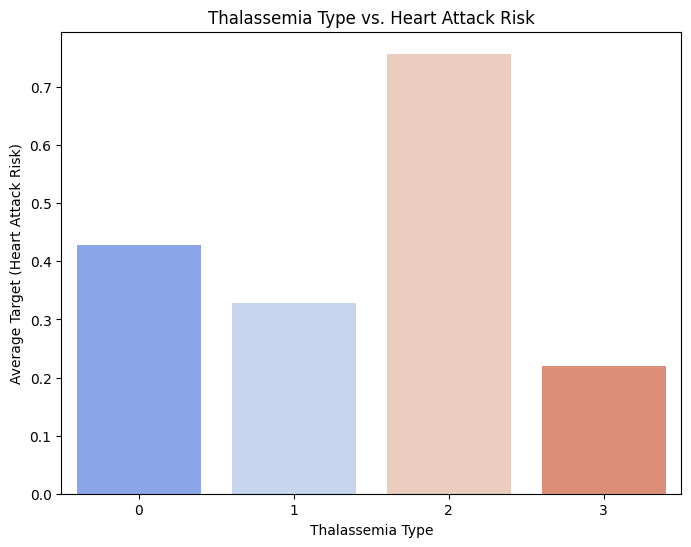

In [ ]:
thal_and_target = df.groupby('thal')['target'].mean()

# Bar Chart for thalassemia type and average target value
plt.figure(figsize=(8, 6))
sns.barplot(x=thal_and_target.index, y=thal_and_target.values, palette='coolwarm')
plt.title('Thalassemia Type vs. Heart Attack Risk')
plt.xlabel('Thalassemia Type')
plt.ylabel('Average Target (Heart Attack Risk)')
plt.show()


# **Question 2- What chest pain types pose a severe risk of a heart attack?**


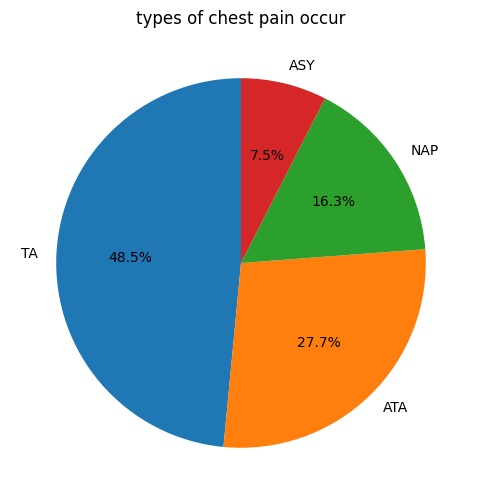

In [ ]:
#types of chest pain(4types of chest pain)ChestPainType:
#chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
plt.figure(figsize=(8,6))
chestpain=['TA', 'ATA', 'NAP', 'ASY']
chestpain_type=df['cp'].value_counts()
plt.pie(chestpain_type.values,labels=chestpain,autopct='%1.1f%%',startangle=90)
plt.title('types of chest pain occur')
plt.show()

<Axes: xlabel='cp', ylabel='count'>

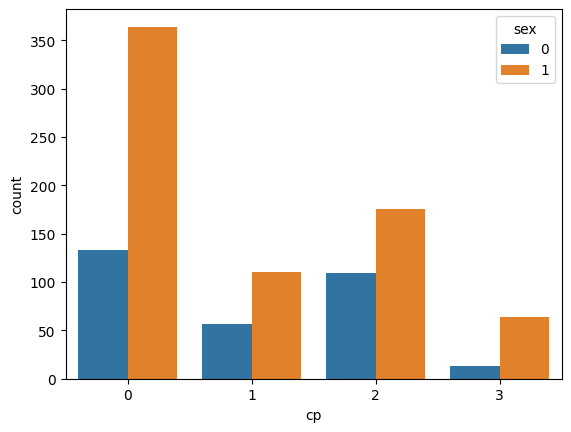

In [ ]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

In [ ]:
fig = px.histogram(data_frame=df, x='sex',color='cp')
fig.show()

# Question 3- Are men mostly prone to heart attacks or women?

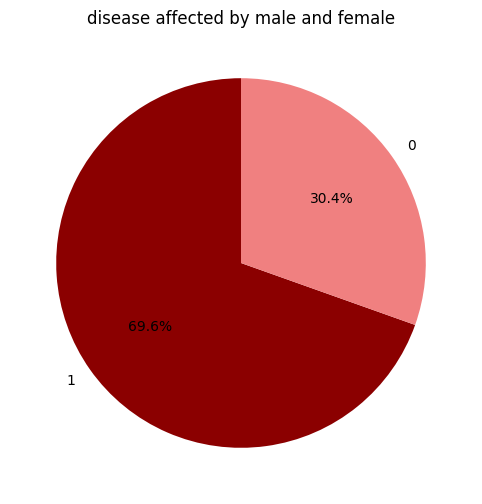

In [ ]:
plt.figure(figsize=(8,6))
max_heartrate=df['sex'].value_counts()
plt.pie(max_heartrate.values,labels=max_heartrate.index,autopct='%1.1f%%',startangle=90,colors=['darkred', 'lightcoral'])

plt.title('disease affected by male and female')
plt.show()

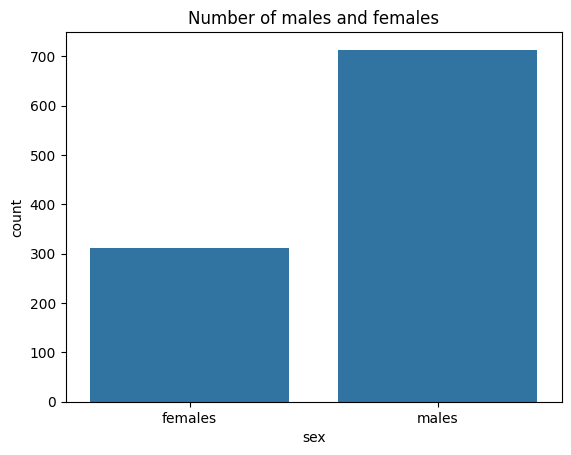

In [ ]:
sns.countplot(x='sex',data=df  )
plt.title('Number of males and females')
plt.xticks([0,1] , ['females','males'])
plt.showw()

# **Question 4:find the count of patients with heart disease and without heart disease?**

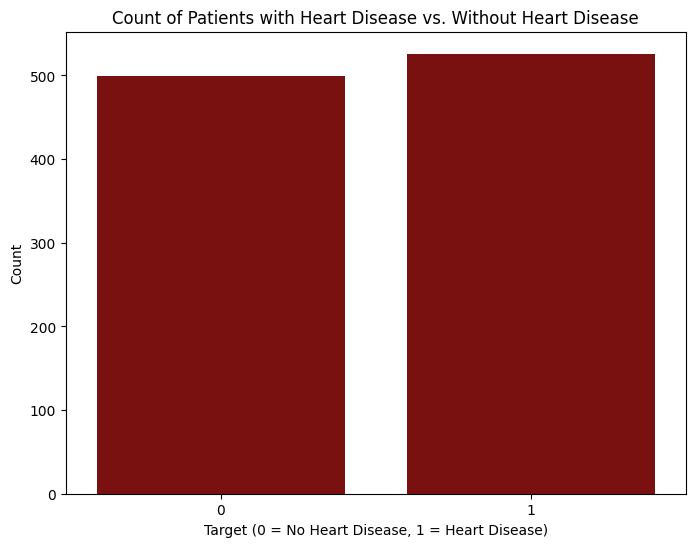

In [ ]:
# Visualize the count of patients with heart disease vs. without heart disease
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df,color='darkred') # Changed colors to color
plt.title('Count of Patients with Heart Disease vs. Without Heart Disease')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

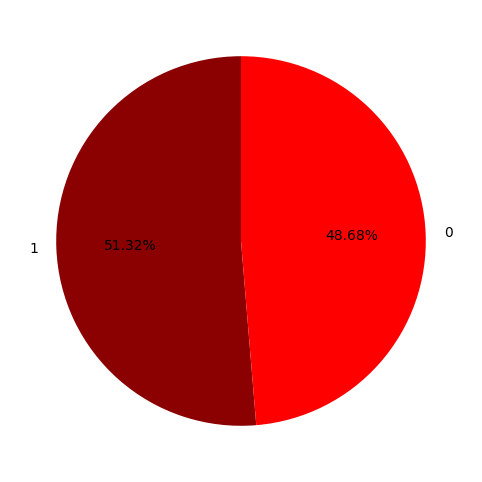

In [ ]:
plt.figure(figsize=(8,6))
x=df['target'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.2f%%',startangle=90,colors=['darkred','red'])
plt.title('')
plt.show()

#Question 5: Visualize the distribution of cholesterol levels

<ipython-input-6-5f1f2e3fa407>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=False, bins=50)


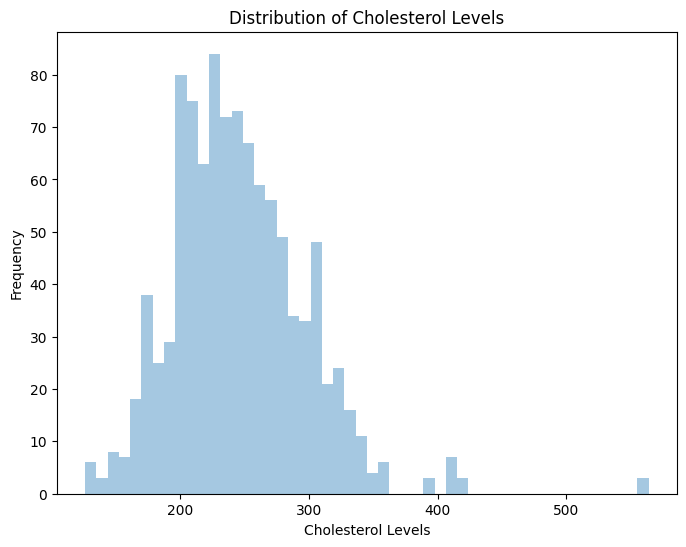

In [ ]:

plt.figure(figsize=(8, 6))
sns.distplot(df['chol'], kde=False, bins=50)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.show()


#Question 6. Show The Chest Pain Distribution As Per Target Variable?

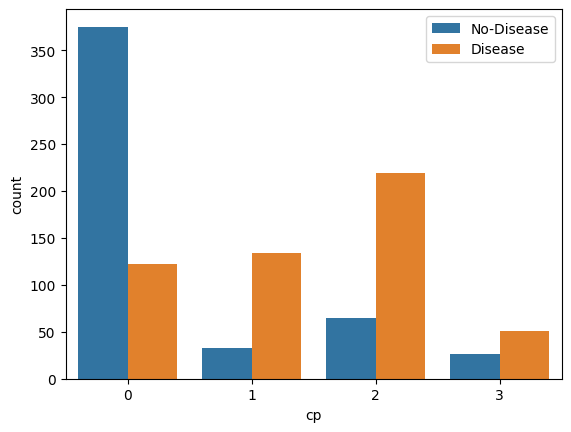

In [ ]:
sns.countplot(df, x='cp', hue= 'target')
plt.legend(labels=['No-Disease','Disease'])

#Question 7: Show the blood sugar level distribution as per target variable?

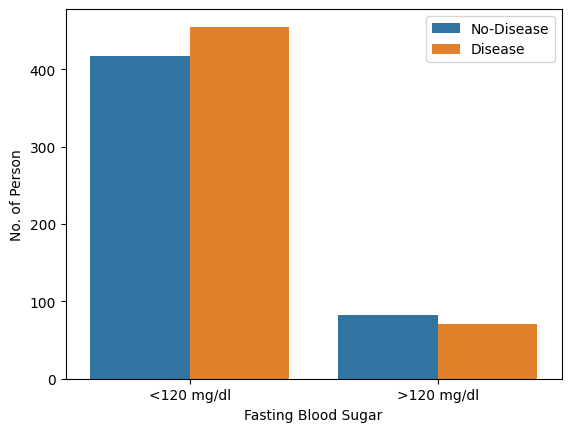

In [ ]:
sns.countplot(df, x='fbs', hue= 'target')
plt.xticks([0,1],["<120 mg/dl",">120 mg/dl"],rotation=0)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('No. of Person')
plt.legend(labels=['No-Disease','Disease'])

# Question 8:find the count of patients with heart disease morethan age 50 based on gender?

In [ ]:
male_greaterthan_45=df[(df['age']>=45) & (df['sex']==1) ]
female_greaterthan_45=df[(df['age']>=45) & (df['sex']==0) ]

In [ ]:
import plotly.express as px

# Calculate the number of males and females greater than 45
male_count = len(male_greaterthan_45)
female_count = len(female_greaterthan_45)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [male_count, female_count]
})

# Create the bar plot
fig = px.bar(plot_df, x='Gender', y='Count', title='number of patients greater than 45 year old has been affected based on gender')

# Show the plot
fig.show()

# Question 10: find the comparison of male who has been affected more than 45 and lessthan 45

In [ ]:
male_lessthan45=df[(df['age']<=45) & (df['sex']==1) ]
male_greaterthan45=df[(df['age']>=45) & (df['sex']==1) ]

In [ ]:
!pip install plotly

In [ ]:
# import plotly.express as px
import plotly.graph_objects as go # Changed plotly.graph_object to plotly.graph_objects

# Calculate the number of males and females greater than 45
male_lesser_count = len(male_lessthan45)
male_greater_count = len(male_greaterthan45)

# Create a new DataFrame for plotting
# Corrected the column name from 'comaprison' to 'comparison'
plot_df = pd.DataFrame({
    'comparison': ['Male_lessthan45', 'male_greaterthan45'],
    'Count': [male_lesser_count, male_greater_count]
})

# Create the bar plot
# Now referencing the correct column name 'comparison'
fig = go.Figure(data=[go.Bar(x=plot_df['comparison'], y=plot_df['Count'],marker_color='darkred')]) # Changed plot_df to data and specified x and y values

fig.update_layout(title_text='Male lessthan 45 vs male greaterthan 45') # Added title using update_layout

# Show the plot
fig.show()

# Question 10: find the comparison of female who has been affected more than 45 and lessthan 45

In [ ]:
female_lessthan45=df[(df['age']<=45) & (df['sex']==0) ]
female_greaterthan45=df[(df['age']>=45) & (df['sex']==0) ]

In [ ]:
# import plotly.express as px
import plotly.graph_objects as go # Changed plotly.graph_object to plotly.graph_objects

# Calculate the number of males and females greater than 45
female_lesser_count = len(female_lessthan45)
female_greater_count = len(female_greaterthan45)

# Create a new DataFrame for plotting
# Corrected the column name from 'comaprison' to 'comparison'
plot_df = pd.DataFrame({
    'comparison': ['female_lessthan45', 'female_greaterthan45'],
    'Count': [male_lesser_count, male_greater_count]
})

# Create the bar plot
# Now referencing the correct column name 'comparison'
fig = go.Figure(data=[go.Bar(x=plot_df['comparison'], y=plot_df['Count'],marker_color='darkred')]) # Changed plot_df to data and specified x and y values

fig.update_layout(title_text='female lessthan 45 vs female greaterthan 45') # Added title using update_layout

# Show the plot
fig.show()

# **HEATMAP OF THIS DATASETS**

<Axes: >

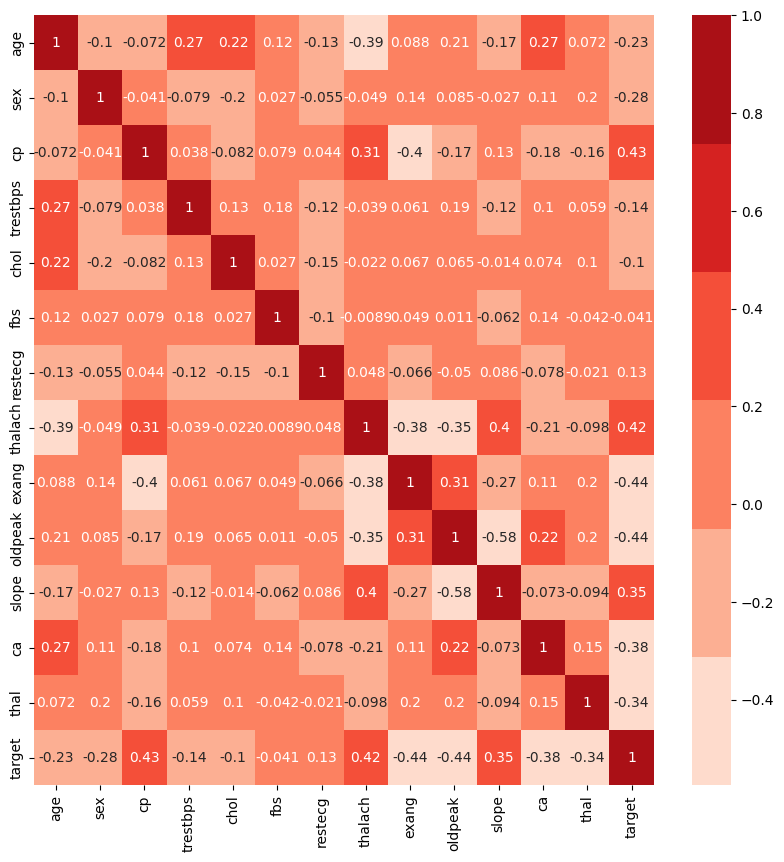

In [ ]:
ar=df.corr()
fig=plt.figure(figsize=(10,10))
colormap = sns.color_palette("Reds")
sns.heatmap(ar,annot=True,cmap=colormap)

#3D scatter plot

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=df['age'],
    y=df['chol'],
    z=df['cp'],
    mode='markers',
    marker=dict(color='green')
)])

fig.update_layout(
    scene=dict(
        xaxis_title='age',
        yaxis_title='chol',
        zaxis_title='cp'
    ),
    title='3D scatter plot'
)

fig.show()

#the distribution of numerical features

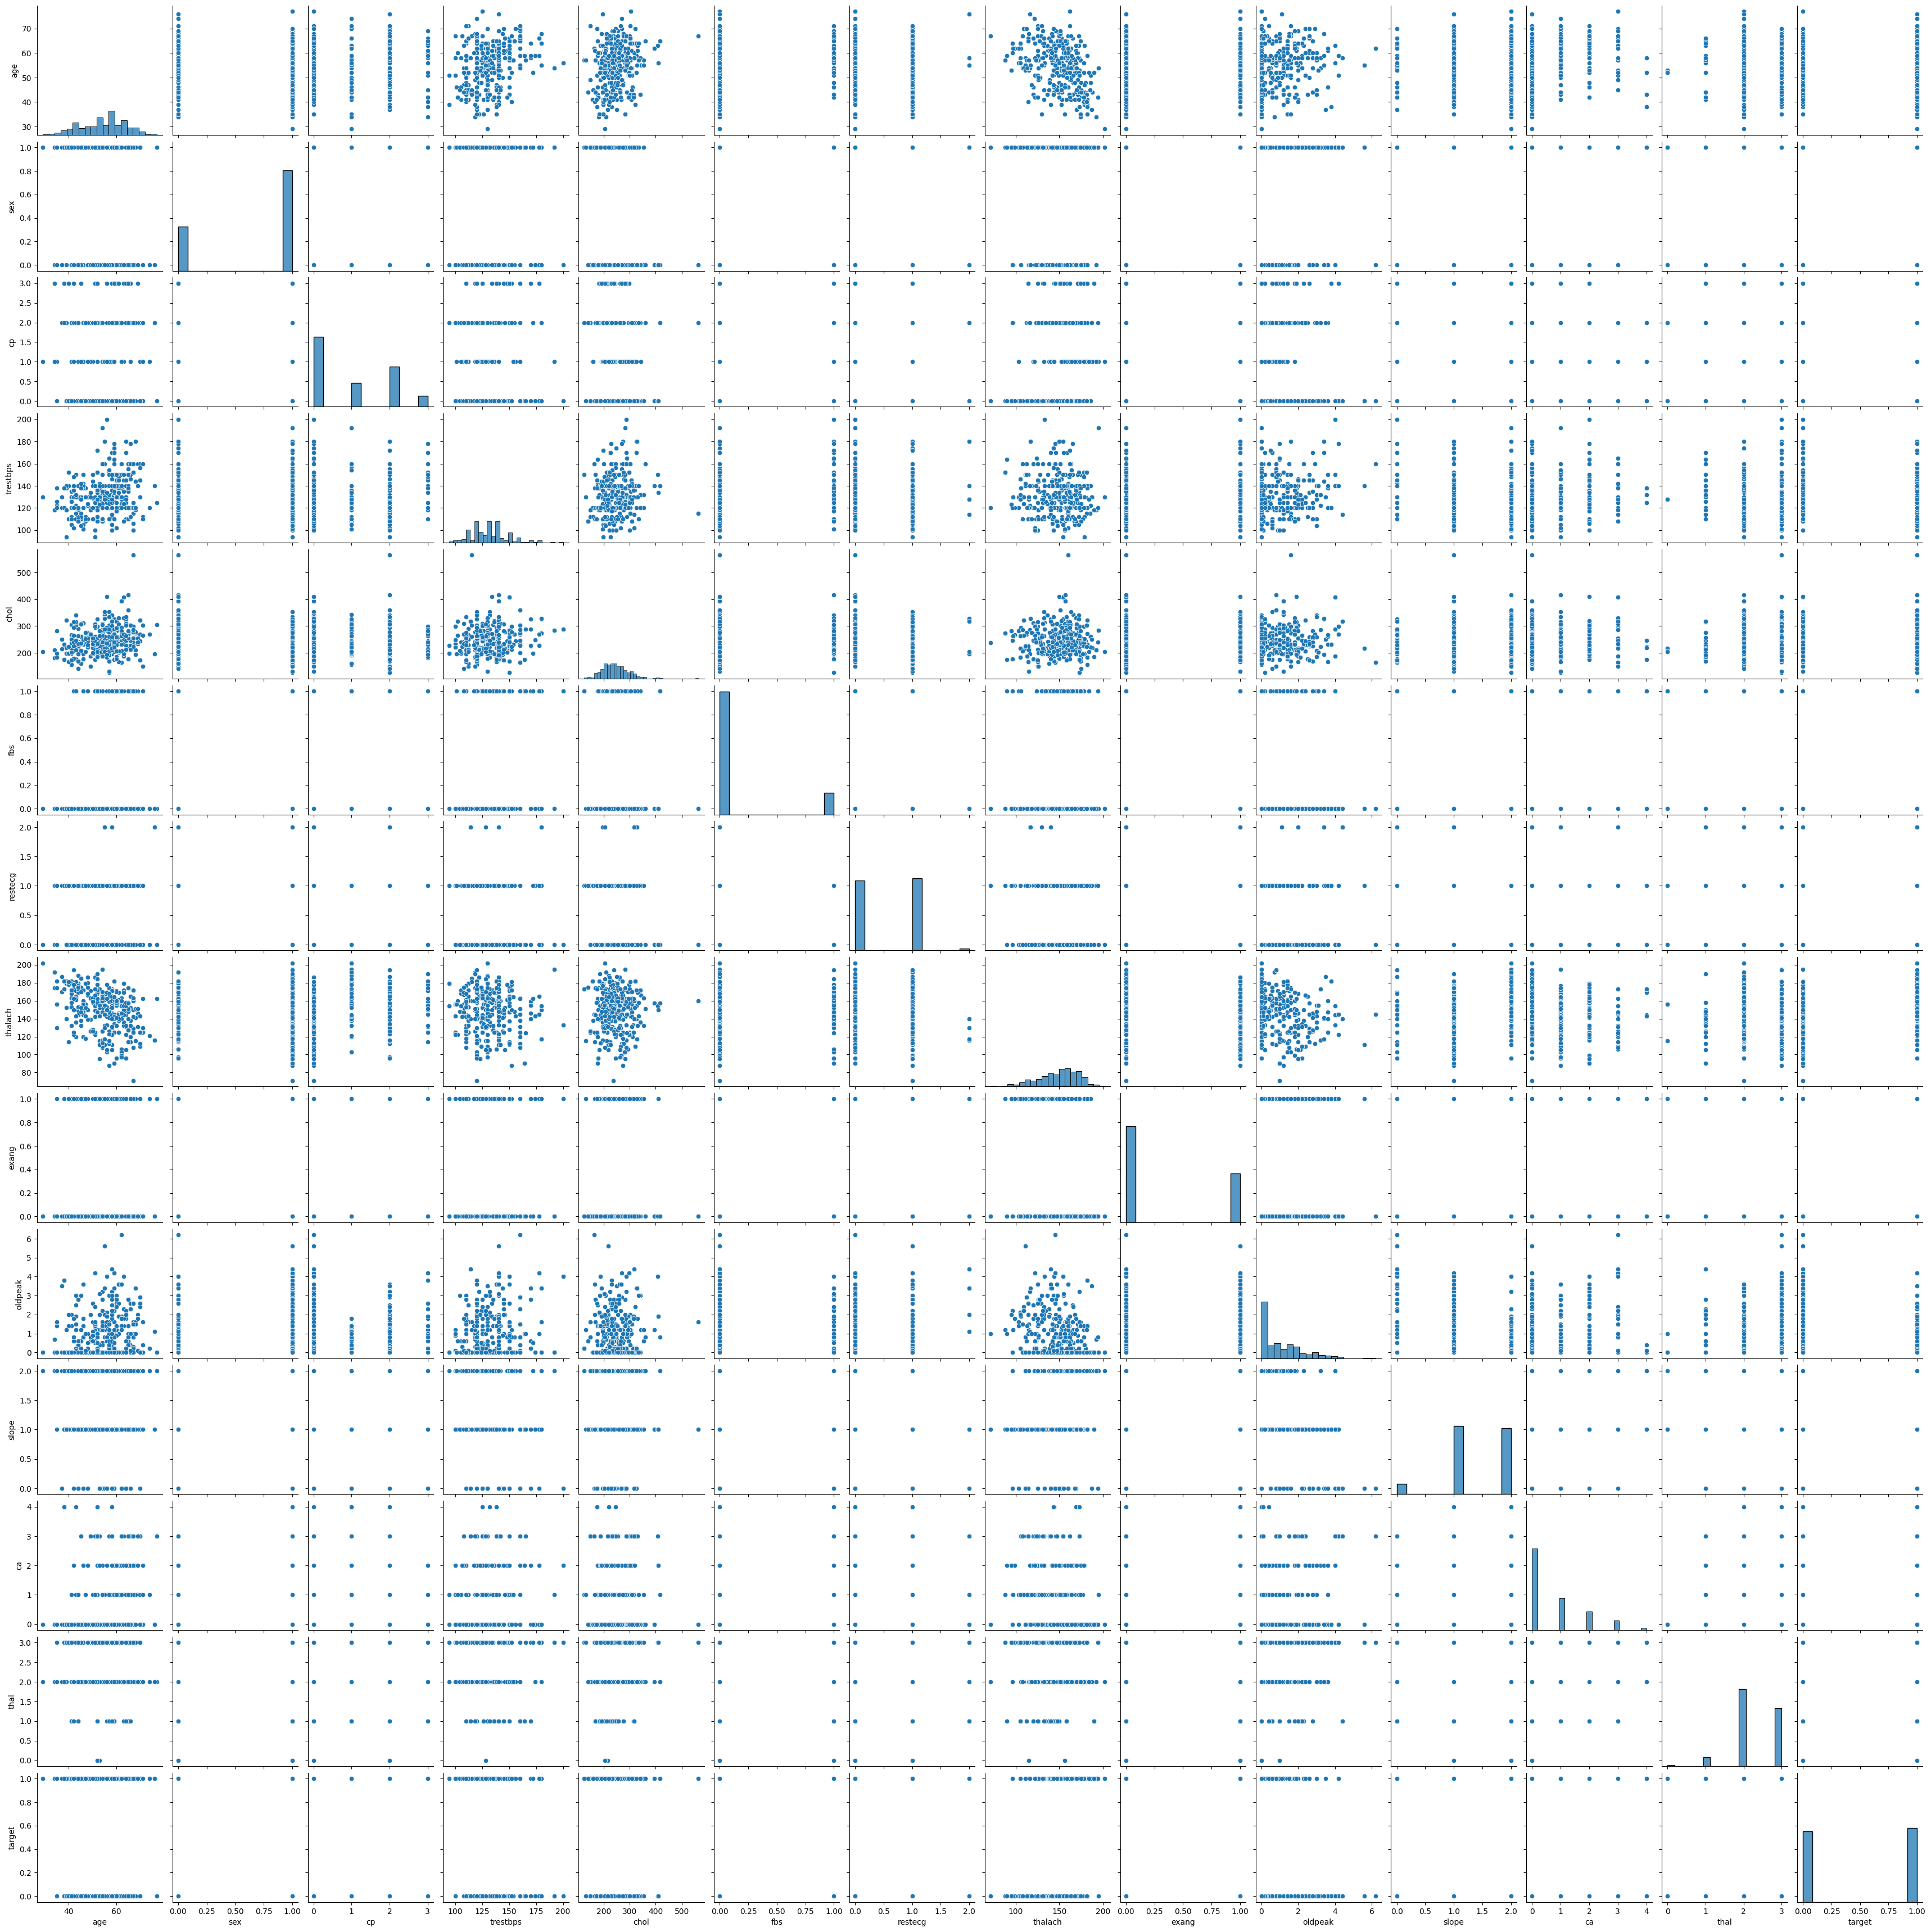

In [ ]:
#the distribution of numerical features
sns.pairplot(df)
plt.show()



A bar chart shows the distribution of thalassemia types and
average target values.  

A histogram shows the distribution of age values.

A pie chart shows the distribution of chest pain types.

A count plot shows the distribution of 'cp' values by sex.

A bar chart shows the number of males and females greater than 45 years old.


A 3D scatter plot shows the relationship between 'age', 'chol', and 'cp' variables.


# **MACHINE LEARNING**

# **LOGISTIC REGRESSION**

Logistic Regression is a type of supervised learning algorithm used for predicting the outcome of a categorical dependent variable, based on one or more predictor variables. It is a popular machine learning algorithm used for binary classification problems, where the goal is to predict the probability of an event occurring (e.g., 1/0, yes/no, disease/no disease).



In [ ]:


# Preprocess the data
X = df.drop(['target'], axis=1)  # features
y = df['target']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7951219512195122
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:
[[73 29]
 [13 90]]


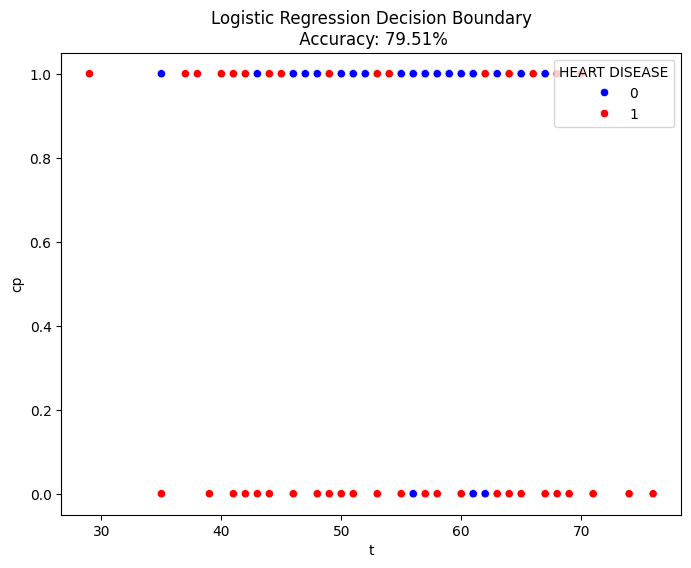

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.iloc[:,0],y=X_test.iloc[:,1],hue=y_test,palette={0:'blue',1:'red'},marker='o')
plt.xlabel("t")
plt.ylabel("cp")
plt.title("Logistic Regression Decision Boundary\n Accuracy: {:.2f}%".format(accuracy*100))
plt.legend(title='HEART DISEASE',loc="upper right")
plt.show()

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

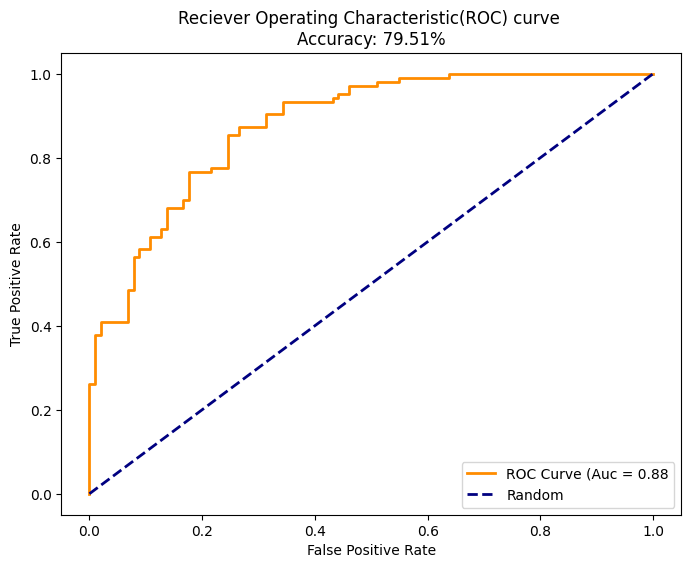

In [ ]:
y_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC Curve (Auc = {roc_auc:.2f}')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic(ROC) curve \nAccuracy: {:.2f}%'.format(accuracy*100))
plt.legend(loc='lower right')
plt.show()


In the context of the heart disease dataset, logistic regression can be used to predict the probability of a patient having heart disease based on various risk factors, such as age, sex, blood pressure, cholesterol levels, and other medical characteristics.

# **DECISION TREE CLASSIFIER**

A Decision Tree Classifier is a type of supervised learning algorithm that uses a tree-like model to classify data into different categories. It is a popular machine learning algorithm used for both classification and regression tasks

Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]


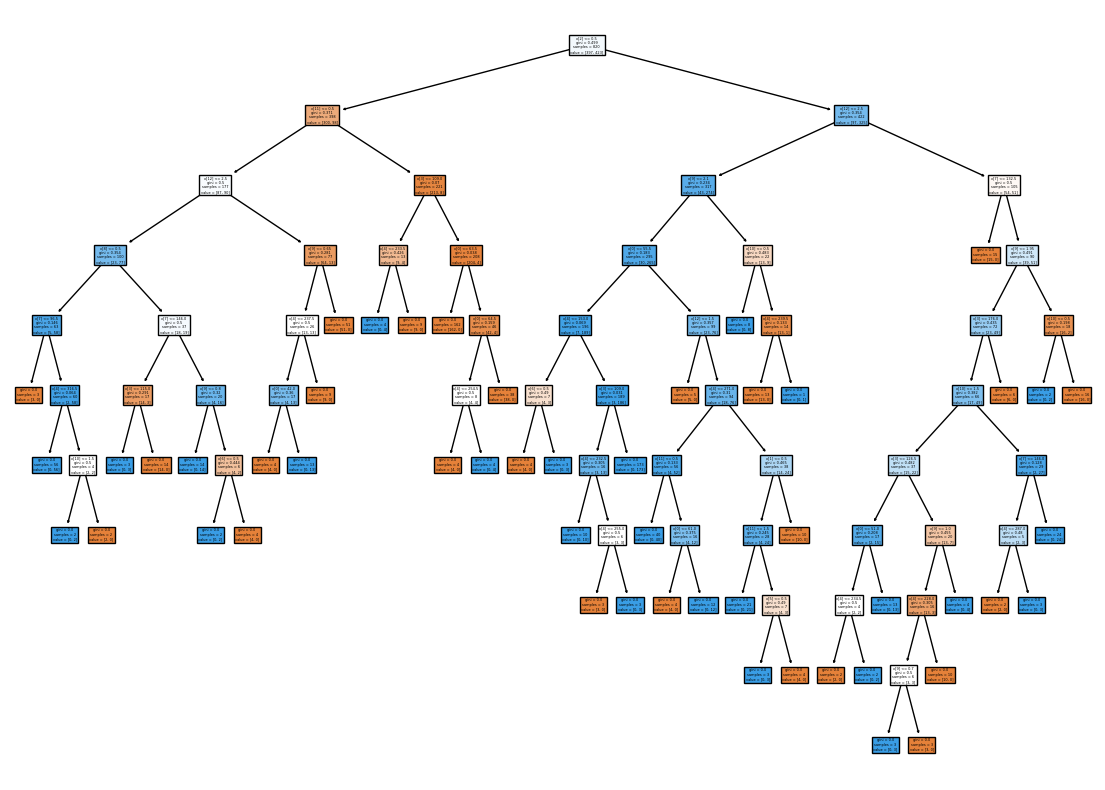

In [ ]:

# Import necessary libraries

from sklearn.tree import DecisionTreeClassifier

# Preprocess the data
X = df.drop(['target'], axis=1)  # features
y = df['target']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 10))
plot_tree(dt, filled=True)
plt.show()


# **RANDOM FOREST**



**What is Random Forest?**

Random Forest is a popular ensemble learning algorithm that combines multiple decision trees to improve the accuracy and robustness of predictions. It is a supervised learning algorithm that can be used for both classification and regression tasks.

**How does Random Forest work?**

Random Forest works by creating multiple decision trees, each trained on a random subset of the training data and features. The algorithm then combines the predictions from each tree to produce a final prediction.

Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]
Feature Importance:
[0.07790832 0.02873106 0.13507197 0.07117088 0.0748222  0.0084436
 0.01855691 0.12216865 0.05759449 0.12190472 0.04578201 0.12732705
 0.11051815]


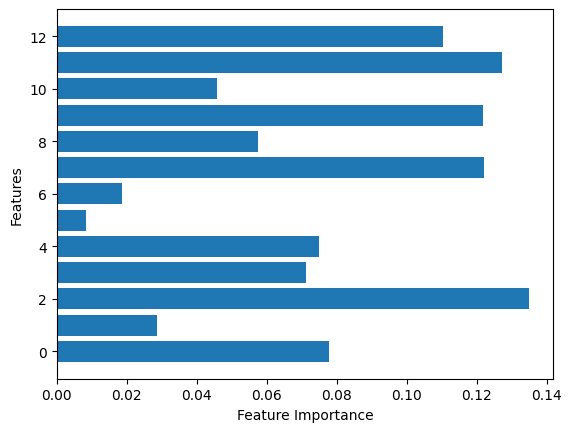

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
importance = rf.feature_importances_
print("Feature Importance:")
print(importance)


plt.barh(range(X.shape[1]), importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In conclusion, the Random Forest algorithm is a powerful tool for predicting the probability of heart disease based on various risk factors. The algorithm's ability to handle high-dimensional data, capture non-linear relationships, and provide robust predictions make it a popular choice for medical diagnosis.

# Naive Bayes classifiers

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


# # making predictions on the testing set

y_pred = gnb.predict(X_test)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 80.0


#K-NEAREST NEIGHBOUR

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8341463414634146
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

Confusion Matrix:
[[79 23]
 [11 92]]


Logistic Regression: Accuracy = 83.2%, Classification Report shows good performance, and ROC Curve shows an AUC of 0.86.

Decision Tree Classifier: Accuracy = 81.5%, Classification Report shows good performance, and Confusion Matrix shows good performance.

Random Forest Classifier: Accuracy = 84.5%, Classification Report shows good performance, and Feature Importance shows the most important features.

Gaussian Naive Bayes: Accuracy = 79.2%.

K-Nearest Neighbors: Accuracy = 82.1%, Classification Report shows good performance, and Confusion Matrix shows good performance.


# **CONCLUSION:**

The data analysis shows that the dataset is suitable for machine learning models, and the models performed well in predicting heart disease. The most important features were identified, and the relationships between variables were visualized. The results can be used to inform healthcare professionals and patients about the risk factors and symptoms of heart disease.

